In [18]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../../DATASET/DXG.csv')

# Preprocess data
# Covert volume from string to number
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Apply convert_volume_to_number function to Volume column
data["Volume"] = data["Volume"].apply(convert_volume_to_number)

# Covert change % from string to number
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Apply convert_change_to_number function to Change % column
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Function to convert string to number
def convert_str_to_number(str):
    return float(str.replace(',', ''))


# Apply convert_str_to_number function to Close, Open, High, Low columns
data['Close'] = data['Close'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)
data

,Date,Close,Open,High,Low,Volume,Change %
0,1/3/2024,18450.0,18300.0,18500.0,18150.0,9350000,0.0110
1,29/02/2024,18250.0,18150.0,18400.0,18050.0,13440000,0.0111
2,28/02/2024,18050.0,18300.0,18350.0,18000.0,6990000,-0.0082
3,27/02/2024,18200.0,18000.0,18300.0,17800.0,11250000,0.0196
4,26/02/2024,17850.0,18100.0,18150.0,17650.0,9100000,-0.0165
...,...,...,...,...,...,...,...
1247,7/3/2019,17092.0,17912.4,17912.4,17092.0,3840000,-0.0329
1248,6/3/2019,17673.2,17502.2,17741.5,17365.5,1640000,0.0098
1249,5/3/2019,17502.2,17775.7,17912.4,17365.5,3490000,-0.0173
1250,4/3/2019,17809.9,17228.8,17878.3,17092.0,5540000,0.0441


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [20]:
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [21]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Create the model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [22]:
# 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [23]:
# Predict the closing prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21411.84546012 21413.34604935 21414.84663859 21416.34722783
 21417.84781707 21419.34840631 21420.84899555 21422.34958479
 21423.85017403 21425.35076327 21426.8513525  21428.35194174
 21429.85253098 21431.35312022 21432.85370946 21434.3542987
 21435.85488794 21437.35547718 21438.85606641 21440.35665565
 21441.85724489 21443.35783413 21444.85842337 21446.35901261
 21447.85960185 21449.36019109 21450.86078032 21452.36136956
 21453.8619588  21455.36254804]


In [24]:
# Convert y_val and y_test to numeric
y_val = pd.to_numeric(y_val, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Calculate RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 7910.192638258588
Testing RMSE: 10313.93580247485


Validation RMSE: 7910.192638258588
Testing RMSE: 10313.93580247485


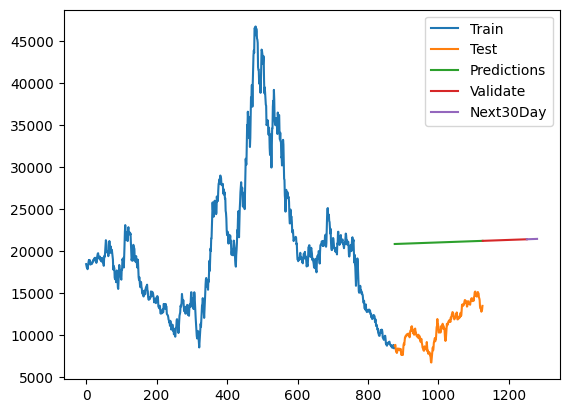

In [25]:
# Calculate RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Plot the data
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [26]:
test_data.index

RangeIndex(start=876, stop=1126, step=1)

In [27]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Calculate MAPE, RMSE and MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# Print the performance metrics
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 7910.192638258588
Testing RMSE: 10313.93580247485
Validation MAPE: 59.23285677640614
Testing MAPE: 100.22430675997585
Validation MDA: 53.6
Testing MDA: 48.99598393574297
